# Document Similarity Heatmap

The following notebook walks you through creating a heatmap of a document similarity matrix. The matrix was made using Latent Semantic Analysis (LSA). The matrix is in the form of a .csv file created using our "docSimLSACleanData" notebook. 

###  Before we begin
Before we start, you will need to have set up a [Carbonate account](https://kb.iu.edu/d/aolp) in order to access [Research Desktop (ReD)](https://kb.iu.edu/d/apum). You will also need to have access to ReD through the [thinlinc client](https://kb.iu.edu/d/aput). If you have not done any of this, or have only done some of this, but not all, you should go to our [textPrep-Py.ipynb](https://github.com/cyberdh/Text-Analysis/blob/drafts/textPrep-Py.ipynb) before you proceed further. The textPrep-Py notebook provides information and resources on how to get a Carbonate account, how to set up ReD, and how to get started using the Jupyter Notebook on ReD.   

### Run CyberDH environment
The code in the cell below points to a Python environment specificaly for use with the Python Jupyter Notebooks created by Cyberinfrastructure for Digital Humanities. It allows for the use of the different pakcages in our notebooks and their subsequent data sets.

##### Packages
- **sys:** Provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter. It is always available.
- **os:** Provides a portable way of using operating system dependent functionality.

#### NOTE: This cell is only for use with Research Desktop. You will get an error if you try to run this cell on your personal device!!

In [1]:
import sys
import os
sys.path.insert(0,"/N/u/cyberdh/Carbonate/dhPyEnviron/lib/python3.6/site-packages")
os.environ["NLTK_DATA"] = "/N/u/cyberdh/Carbonate/dhPyEnviron/nltk_data"

### Include necessary packages for notebook 

Python's extensibility comes in large part from packages. Packages are groups of functions, data, and algorithms that allow users to easily carry out processes without recreating the wheel. Some packages are included in the basic installation of Python, others created by Python users are available for download. Make sure to have the following packages installed before beginning so that they can be accessed while running the scripts.

In your terminal, packages can be installed by simply typing `pip install nameofpackage --user`. However, since you are using ReD and our Python environment, you will not need to install any of the packages below to use this notebook. Anytime you need to make use of a package, however, you need to import it so that Python knows to look in these packages for any functions or commands you use. Below is a brief description of the packages we are using in this notebook:  

- **pandas:** An open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
- **seaborn:** a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- **matplotlib:** Produces publication quality 2D graphics for interactive graphing, scientific publishing, user interface development and web application servers targeting multiple user interfaces and hardcopy output formats.

Notice we import some of the packages differently. In some cases we just import the entire package when we say `import XYZ`. For some packages which are small, or, from which we are going to use a lot of the functionality it provides, this is fine. 

Sometimes when we import the package directly we say `import XYZ as X`. All this does is allow us to type `X` instead of `XYZ` when we use certain functions from the package. So we can now say `X.function()` instead of `XYZ.function()`. This saves time typing and eliminates errors from having to type out longer package names. I could just as easily type `import XYZ as potato` and whenever I use a function from the `XYZ` package I would need to type `potato.function()`. What we import the package as is up to you, but some commonly used packages have abbreviations that are standard amongst Python users such as `import pandas as pd` or `import matplotlib.pyplot as plt`. You do not need to us `pd` or `plt`, however, these are widely used and using something else could confuse other users and is generally considered bad practice. 

Other times we import only specific elements or functions from a package. This is common with packages that are very large and provide a lot of functionality, but from which we are only using a couple functions or a specific subset of the package that contains the functionality we need. This is seen when we say `from XYZ import ABC`. This is saying I only want the `ABC` function from the `XYZ` package. Sometimes we need to point to the specific location where a function is located within the package. We do this by adding periods in between the directory names, so it would look like `from XYZ.123.A1B2 import LMN`. This says we want the `LMN` function which is located in the `XYZ` package and then the `123` and `A1B2` directory in that package. 

You can also import more than one function from a package by separating the functions with commas like this `from XYZ import ABC, LMN, QRS`. This imports the `ABC`, `LMN` and `QRS` functions from the `XYZ` package.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Getting your data

#### File paths
Here we are saving as variables different file paths that we need in our code. We do this so that they are easier to call later and so that you can make most of your changes now and not need to make as many changes later. 

First we use the `os` package above to find our `["HOME"]` directory using the `environ` function. This will work for any operating system, so if you decide to try this out on your personal computer instead of ReD, the `homePath` variable will still be the path to your 'home' directory, so no changes are needed.

Next, we combine the `homePath` variable with the folder names that lead to where our data is stored. Note that we do not use any file names yet, just the path to the folder. This is because we are comparing documents to one another, so we need to read in an entire directory. You will want to change the folder names to match your folder names in your file path. We assign this path to the variable `cleanedData`.

Now we add the `homePath` variable to other folder names that lead to a folder where we will want to save any output generated by this code. You again will want to change the file names in the path to match your own file names. We save this file path as the variable `dataResults`.

Lastly, we add the file name of our .csv file containing the document similarity matrix to the path assigned to the `cleanedData` variable and assign these combined elements to the variable `cleanedCSV`. 

In [3]:
homePath = os.environ["HOME"]
cleanedData = os.path.join(homePath, "Text-Analysis-master", "TopicModeling", "LSA", "cleanedData")
dataResults = os.path.join(homePath, "Text-Analysis-master", "Output")
cleanedCSV = os.path.join(cleanedData, "docSimilarityMatrix.csv")

### Read in .csv file

Now we read in the data. First, we use the `read_csv` function from the pandas package to read in our .csv file. Then we convert the .csv file to a dataframe using the pandas package again. Next, we set the column being used to index the dataframe to the column containing the file names. Unfortunately, the header of the column is kept when we do this so we use `del sdf.index.name` to delete the header name from the index. Lastly, we need to remove the column containing the file names since we now have them as our index column. Finally, we take a look at the dataframe that will be used to create the heatmap.

In [4]:
csvDF = pd.read_csv(cleanedCSV)
df = pd.DataFrame(csvDF)
sdf = df.set_index(df["Unnamed: 0"])
del sdf.index.name
del sdf["Unnamed: 0"]
sdf

,1589TwoGentlemenOfVerona.txt,1590TamingOfTheShrew.txt,1591KingHenry6_1.txt,1591KingHenry6_2.txt,1591KingHenry6_3.txt,1591TitusAndronicus.txt,1592KingRichard3.txt,1594ComedyOfErrors.txt,1594LovesLaboursLost.txt,1595KingRichard2.txt,...,1604AllsWellThatEndsWell.txt,1605KingLear.txt,1605TimonOfAthens.txt,1606AnthonyAndCleopatra.txt,1606Macbeth.txt,1608Coriolanus.txt,1609WintersTale.txt,1610Cymbeline.txt,1610Tempest.txt,1612KingHenry8.txt
1589TwoGentlemenOfVerona.txt,NaN,0.964535,0.949497,0.954950,0.946128,0.950569,0.967762,0.969305,0.971442,0.961420,...,0.977389,0.973026,0.954501,0.955959,0.960946,0.967746,0.973300,0.973470,0.966604,0.971802
1590TamingOfTheShrew.txt,0.964535,NaN,0.952372,0.958333,0.948960,0.953741,0.970490,0.973852,0.971371,0.964284,...,0.979250,0.976590,0.956952,0.958692,0.964545,0.970785,0.976926,0.976165,0.970395,0.974711
1591KingHenry6_1.txt,0.949497,0.952372,NaN,0.969351,0.956630,0.944794,0.968691,0.958449,0.959332,0.963744,...,0.968322,0.967039,0.948876,0.947603,0.954838,0.958526,0.964879,0.964969,0.958825,0.968787
1591KingHenry6_2.txt,0.954950,0.958333,0.969351,NaN,0.969803,0.951025,0.977397,0.965147,0.965425,0.973257,...,0.973850,0.973815,0.955019,0.953851,0.961380,0.963773,0.971463,0.970908,0.965363,0.977158
1591KingHenry6_3.txt,0.946128,0.948960,0.956630,0.969803,NaN,0.942779,0.972134,0.954736,0.955555,0.964562,...,0.963344,0.962957,0.942983,0.944301,0.951685,0.954144,0.962104,0.961473,0.956453,0.964104
1591TitusAndronicus.txt,0.950569,0.953741,0.944794,0.951025,0.942779,NaN,0.962711,0.959368,0.958439,0.957702,...,0.966768,0.964949,0.947480,0.950283,0.954036,0.964728,0.965045,0.966450,0.958449,0.964161
1592KingRichard3.txt,0.967762,0.970490,0.968691,0.977397,0.972134,0.962711,NaN,0.976368,0.976907,0.981661,...,0.985653,0.983542,0.966377,0.965369,0.972340,0.975788,0.983332,0.982623,0.976337,0.986152
1594ComedyOfErrors.txt,0.969305,0.973852,0.958449,0.965147,0.954736,0.959368,0.976368,NaN,0.976034,0.970774,...,0.985320,0.982219,0.963962,0.964898,0.971183,0.977666,0.982601,0.982667,0.976883,0.980686
1594LovesLaboursLost.txt,0.971442,0.971371,0.959332,0.965425,0.955555,0.958439,0.976907,0.976034,NaN,0.972858,...,0.984468,0.981401,0.963389,0.964461,0.969349,0.974906,0.981423,0.981035,0.974390,0.981099
1595KingRichard2.txt,0.961420,0.964284,0.963744,0.973257,0.964562,0.957702,0.981661,0.970774,0.972858,NaN,...,0.979497,0.978905,0.960119,0.960323,0.968818,0.970798,0.977936,0.977514,0.971938,0.980960


### Plot Heatmap

Now we plot a heatmap and save it as a .svg file for use in a paper, presentation, or even a website. 

First, we name the output file of the heatmap which is in the variable `heatmapFileName`. 

Next we choose the dpi level we want the output to be. We have it set to 600 which is generally good for both print and website use. 

Then we choose the color scheme we want. At the moment we have one where green represents the highest number (most similar) and red represents the lowest numbers (least similar) with yellow being more in the middle. If another color scheme would work better for you other options for color schemes can be found here: [https://matplotlib.org/tutorials/colors/colormaps.html](https://matplotlib.org/tutorials/colors/colormaps.html)

Now we choose the font size. This will depend on your data and the size of your heatmap, so you'll want to play around with the number in `fontScale` until you find a value that works with your heatmap. 


Now we plot our heatmap!

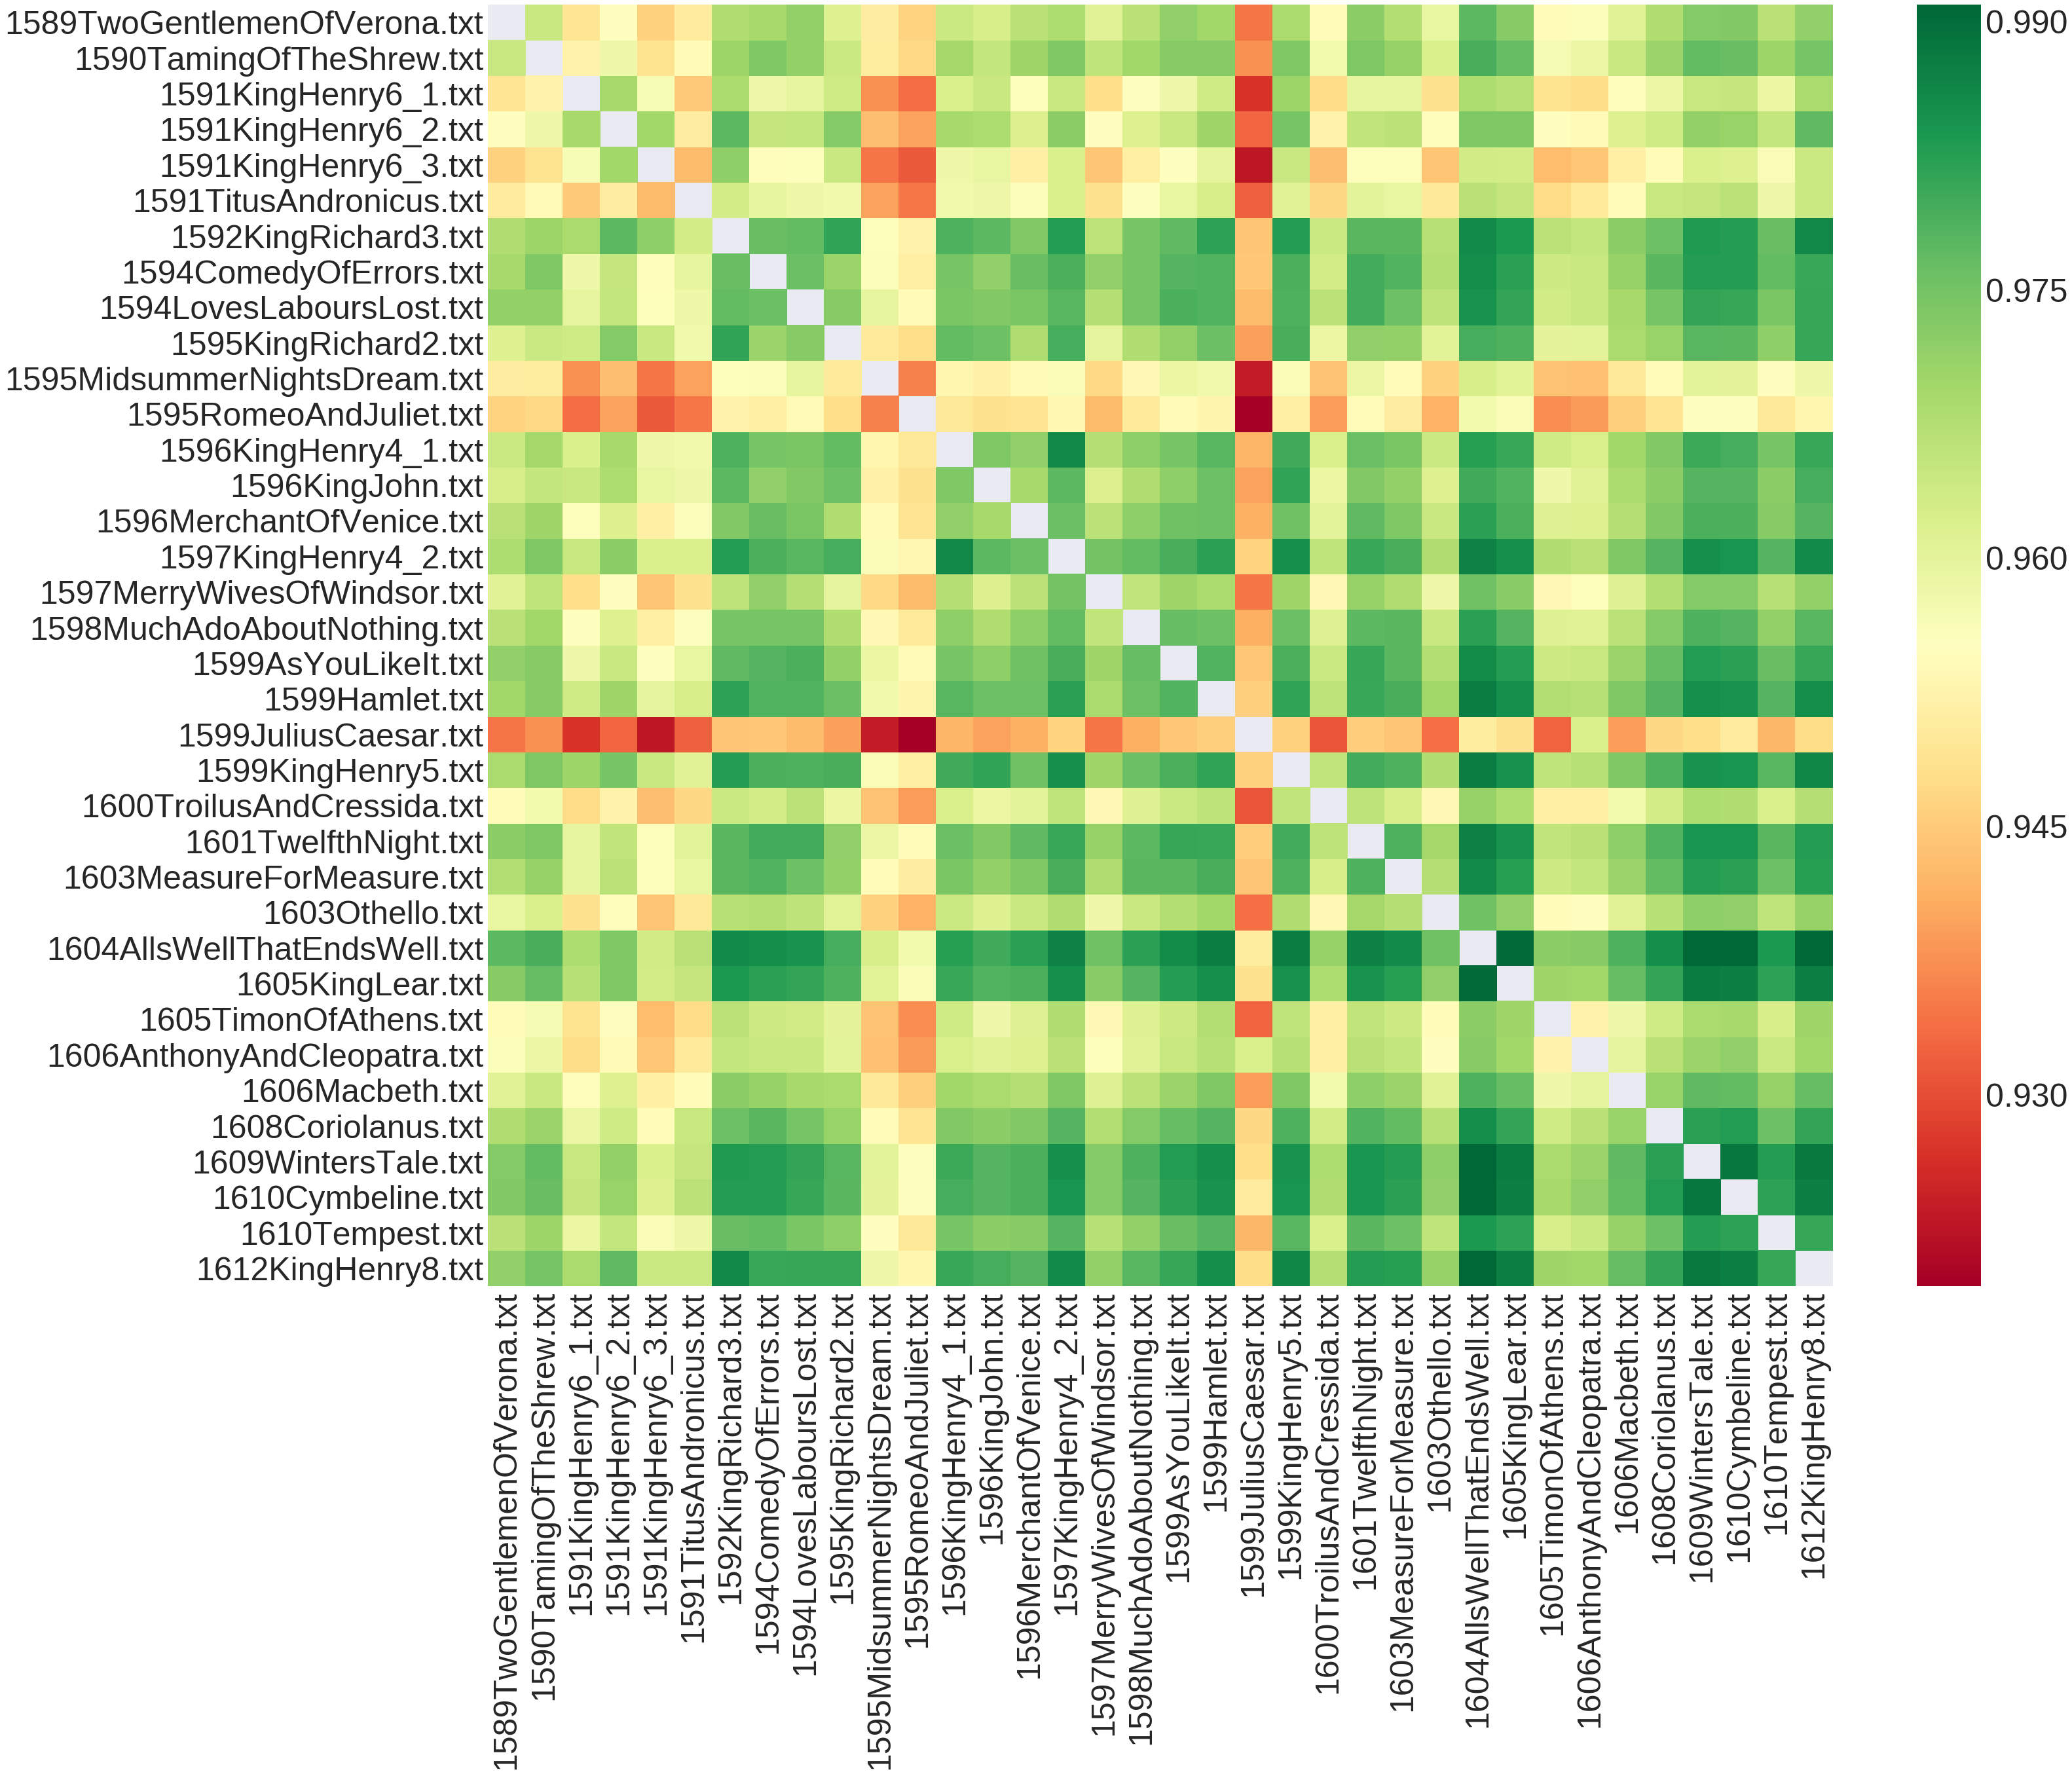

In [5]:
#Variables
heatmapFileName = 'DocSimHeatmap.svg'
dpi = 600
colorScheme = 'RdYlGn'
fontScale = 5

# Plot
figureSize = len(sdf)
sns.set(rc={'figure.figsize':(figureSize + 10, figureSize)}, font_scale = fontScale)
ax = sns.heatmap(sdf, cmap = colorScheme)
ax.figure.savefig(os.path.join(dataResults, heatmapFileName), dpi = dpi, bbox_inches='tight')
plt.show()

## VOILA!!